In [2]:
#debug用

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from pprint import pprint 
from models.models import Factory, Paper,  Char,  Mizu,  Sho, Score,Contour, Recognizer
#自作モジュール
from models import my_cv

(4032, 3024, 3)


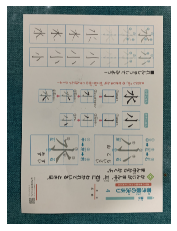

(105321,)
(1309, 1, 2)


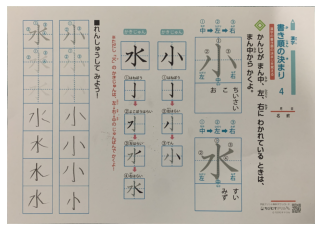

In [2]:
img_ori = cv2.imread('./sample_images/work6.png')#画像読み込み
print(np.shape(img_ori))
my_cv.display_color(img_ori)
#紙の部分を切り出す
img_paper = my_cv.cutting_paper(img_ori)
my_cv.display_color(img_paper,output_file_path = "./tmp/paper.png")


In [5]:
img_paper = cv2.imread('./tmp/paper.png')#debug用
paper = Paper(img_paper,"Sho","Mizu")

16


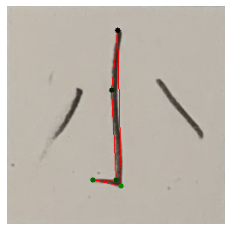

a


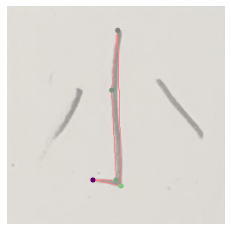

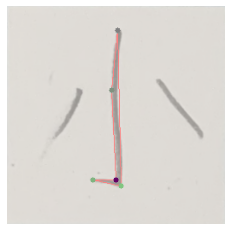

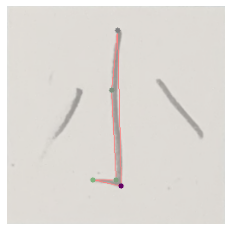

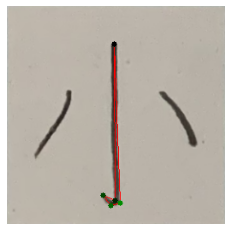

c


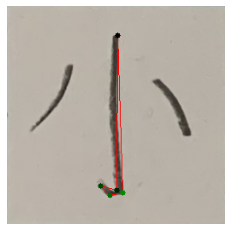

a


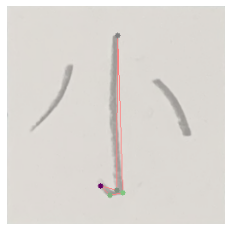

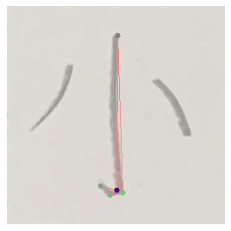

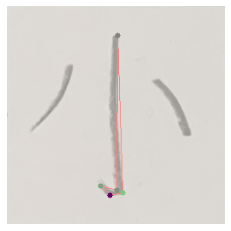

In [6]:
#scoreの取得
score1s , score2s = paper.get_scores()


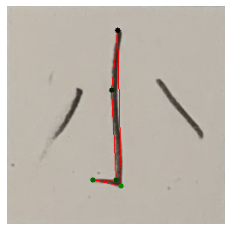

=====小======
ただしく３ほんせんがひけてるね
１かくめがきれいにかけてるね
２かくめがしっかりはねれているね
３かくめがきれいにかけてるね


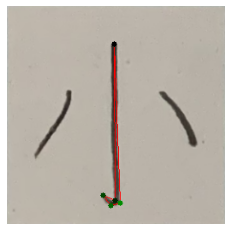

=====小======
ただしく３ほんせんがひけてるね
１かくめがきれいにかけてるね
２かくめのせんはまっすぐたてにかこう
３かくめがきれいにかけてるね


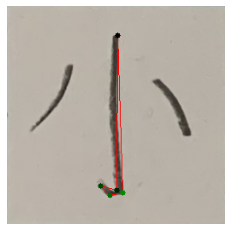

=====小======
ただしく３ほんせんがひけてるね
１かくめがきれいにかけてるね
２かくめがしっかりはねれているね
３かくめがきれいにかけてるね


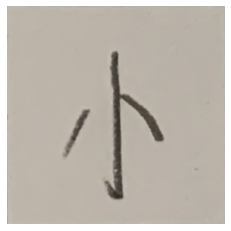

=====小======
かんじのかたちがへんだよ


In [7]:
for score in score1s:
    my_cv.display_color(score.get_img())
    score.print_debug()

In [ ]:
img = paper.char1_exp.img_sq
bgrLower = np.array([102, 255, 255])    # 抽出する色の下限(BGR)
bgrUpper = np.array([102, 255, 255])    # 抽出する色の上限(BGR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

my_cv.display_gray(hsv[:,:,2])
hist = cv2.calcHist([hsv],[2],None,[256],[0,256])
#plt.bar(list(range(len(hist))), hist.reshape(np.shape(hist)[0]))
ret, img_thresh = cv2.threshold(hsv[:,:,2], 130, 255, cv2.THRESH_BINARY)
my_cv.display_gray(img_thresh)

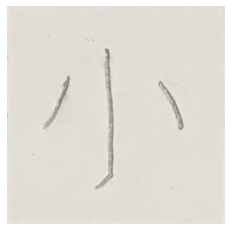

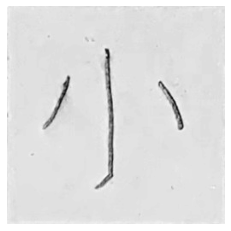

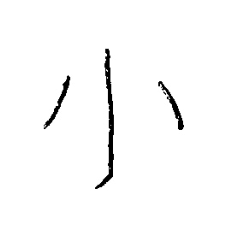

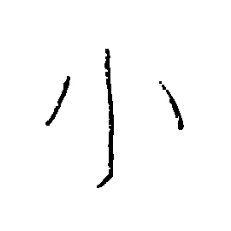

In [35]:
#輪郭の精度向上 変なフィルターかまさんほうが強そう
char = paper.char1s[0]
img = np.copy(char.img_sq)
my_cv.display_color(img)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
my_cv.display_gray(hsv[:,:,2])
_, img_thresh = cv2.threshold(hsv[:,:,2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
img_th_fltr = cv2.morphologyEx(img_thresh,cv2.MORPH_CLOSE,kernel)
#img_thresh = cv2.bitwise_not(img_thresh)
my_cv.display_gray(img_thresh)
my_cv.display_gray(img_th_fltr)

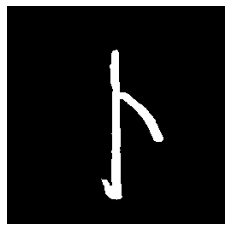

(255, 255)


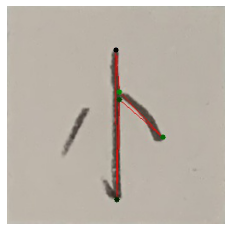

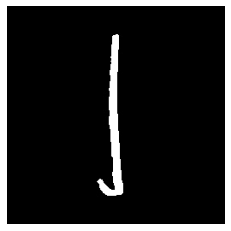

(255, 255)


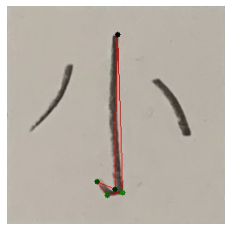

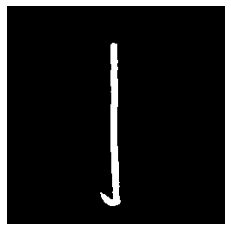

(255, 255)


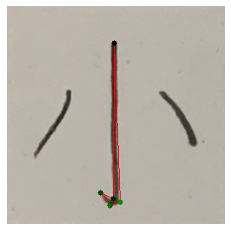

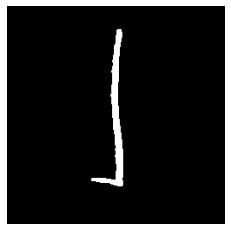

(255, 255)


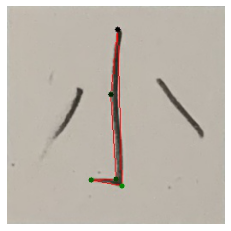

In [5]:
#　線分化

pnum = 5
for char in paper.char1s:
    img_fltr =  my_cv.mor_clear_filter(char.basic_contours[1].img_thresh)
    my_cv.display_gray(img_fltr)
    print(np.shape(img_fltr))
    cnts,_ = cv2.findContours(img_fltr,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    resimg = char.img_sq.copy()
    # 輪郭の周囲に比例する精度で輪郭を近似する
    if len(cnts)  >1 :
        print("ERROR")
        break
    #1.2をかけることで大きい図形に対してのバイアスを強くしている
    for i in range(10000):
        approx = cv2.approxPolyDP(cnts[0], 30-i*0.01, True) #第２引数が小さければ細かい近似大きければ大雑把な近似 1.2をかけること
        #左端の点に隣接している2つのぽいんとがy軸上で横もしくは下にあるかなかったら羽の向きがおかしいか曲がっているか
        if pnum+2 >= len(approx) >= pnum:         
            cv2.polylines(resimg, [approx.reshape(-1,2)], True, (0,0,255), thickness=1, lineType=cv2.LINE_8)
            for i,app in enumerate(approx):
                cv2.circle(resimg, (app[0][0],app[0][1]), 3, (0, 0+35*i, 0), thickness=-1)
            my_cv.display_color(resimg)
            break

In [6]:
imgs = list(map(lambda char: char._get_img_thresh(),paper.char1s))
for img in imgs:
    my_cv.display_gray(img)

TypeError: _get_img_thresh() takes 1 positional argument but 2 were given